# Notebook 8: Neural Networks
This example classifies the digit dataset using a neural network.


To make this run, you need to install PyTorch with `conda install pytorch` or `pip3 install torch` depending on your setup.

### 0. Preamble

In [6]:
!pip install torch 

In [7]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(1)
np.random.seed(1)

The following lines checks for GPU availability on the machine and sets the GPU as processing device (if available).
No worries if you have no GPU available, CPU works also fine for this small example.

In [8]:
if(torch.cuda.is_available()):
  processing_chip = "cuda:0"
  print(f"{torch.cuda.get_device_name(0)} available")
else:
  processing_chip = "cpu"
  print("No GPU available")

device = torch.device(processing_chip)
device

No GPU available


device(type='cpu')

### 1. Data Preperation

We work with the already know digit dataset, where our class is to determine which number is shown on the image. For more details on the dataset, check our previous notebook `2_Logistische_Regression_Digits`.

In [10]:
import pandas as pd
data = pd.read_csv("../data/digits.csv")
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
X = data.drop(["label"], axis=1)
y = data["label"]

In [12]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
train_X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1109,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,...,15.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,6.0
940,0.0,3.0,12.0,12.0,14.0,4.0,0.0,0.0,0.0,1.0,...,8.0,0.0,0.0,2.0,13.0,16.0,16.0,16.0,2.0,0.0
192,0.0,1.0,10.0,15.0,16.0,13.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,15.0,13.0,7.0,0.0,0.0,0.0
260,0.0,0.0,0.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,9.0,0.0,0.0,0.0
1148,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,1.0,8.0,14.0,15.0,2.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,1.0,9.0,12.0,13.0,9.0,0.0,0.0
1216,0.0,2.0,9.0,15.0,16.0,15.0,2.0,0.0,0.0,11.0,...,7.0,0.0,0.0,0.0,12.0,16.0,15.0,9.0,1.0,0.0
1653,0.0,0.0,5.0,14.0,14.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,9.0,13.0,0.0,0.0,0.0,0.0
559,0.0,0.0,4.0,10.0,15.0,16.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,4.0,0.0,0.0,0.0


To be able to use the data in PyTorch, we need to convert our data into PyTorch tensors. Such a tensor can be thought of an efficient way to represent lists and matrices in Python (similar to `numpy`), with the additional benefit that they can be easily copied to the GPU (the `.to(device)` part in the code below) and that they support automatic backpropagation (more on this later):

In [14]:
train_x = torch.Tensor(train_X.values).float().to(device)
test_x = torch.Tensor(test_X.values).float().to(device)
train_y =torch.Tensor(train_y.values).long().to(device)
test_y = torch.Tensor(test_y.values).long().to(device)

### 2A. Model definition 


We define now the structure of our neural network. For this we create a class that is a subclass from PyTorch's `nn.Module`. By convention we put in the `__init__` method the layers we want to use in the network and in the `forward` method how data flows through this network.

Our network has 64 input features, one hidden layer with 5 neurons and 10 output neurons. The hidden layer uses a Relu activation function. Note that the output layer does not have a softmax activation (unlike we have seen it in the lecture). It rather gives out a raw score for each class (more on this later).

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(64, 10)
        self.output = nn.Linear(10, 10)

    def forward(self, x):
        z = F.relu(self.hidden(x))
        z = self.output(z)  # no softmax. see CrossEntropyLoss() 
        return z

### 3. Model Training

We can now start training our network. We run several epochs in which we first predict on the training data with our network and than backpropagate the loss. For this we use PyTorch's build-in optimizer that runs gradient descent on the weights of the network. Hence, in every episode we reduce the loss on the training data and improve our network.

As loss function we use cross entropy, which consumes the raw scores from the prediction and internally applies a softmax (that is why we do not need the softmax as last layer in the network).

Note that all training data is passed at once to our network (line `net(train_x)` ), since PyTorch will predict on all data points in parallel.

In [25]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 1000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  y_hat = net(train_x)

  loss = loss_func(y_hat, train_y)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
  
  if epoch % 100 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")


Starting training 
Loss in epoch 0 is 2.380054473876953
Loss in epoch 100 is 1.4852365255355835
Loss in epoch 200 is 0.6889950633049011
Loss in epoch 300 is 0.4031987190246582
Loss in epoch 400 is 0.2901186943054199
Loss in epoch 500 is 0.23027853667736053
Loss in epoch 600 is 0.1920863389968872
Loss in epoch 700 is 0.16491509974002838
Loss in epoch 800 is 0.1446414440870285
Loss in epoch 900 is 0.1289852261543274
Done training 


One standard way to monitor the training is to plot the loss after every episode. If this goes constantly down, the training is working.

Text(0, 0.5, 'loss')

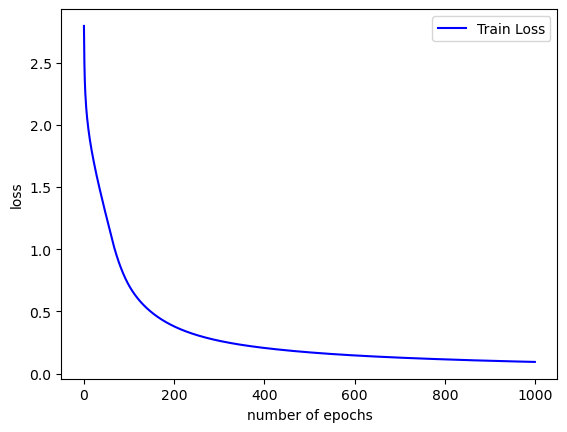

In [19]:
fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')

### 4. Model Evaluation

Finally, we check the model accuracy on the test data. For this we predict on the test data, identify the class with the highest score and compare it to the true label.

In [20]:
net.eval() # set network to evaluation mode
y_pred = net(test_x)
_, predicted = torch.max(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

Accuarcy is 94.72222222222223%


 To check that, calculate the accuracy on the test data already during training after each epoch. Show the plot the results as a second plot similiar to the one above. (Note: Normally we need to do this check on seperate validation data, not on our test data).

In [44]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 10000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

def accurency():
    net.eval() # set network to evaluation mode
    y_pred = net(test_x)
    _, predicted = torch.max(y_pred.data, 1)
    correct = (predicted == test_y).sum().item()
    return 100. * correct / len(test_x)


print("\nStarting training ")
train_accurency = []
train_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  y_hat = net(train_x)

  loss = loss_func(y_hat, train_y)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
    
  train_accurency.append(accurency())
  
  if epoch % 100 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")





Starting training 
Loss in epoch 0 is 2.828622341156006
Loss in epoch 100 is 1.5724351406097412
Loss in epoch 200 is 1.285404920578003
Loss in epoch 300 is 1.0212950706481934
Loss in epoch 400 is 0.8638478517532349
Loss in epoch 500 is 0.7640823721885681
Loss in epoch 600 is 0.6867098212242126
Loss in epoch 700 is 0.6122086048126221
Loss in epoch 800 is 0.5452841520309448
Loss in epoch 900 is 0.4958297312259674
Loss in epoch 1000 is 0.4568518400192261
Loss in epoch 1100 is 0.42414021492004395
Loss in epoch 1200 is 0.3922622501850128
Loss in epoch 1300 is 0.3587331771850586
Loss in epoch 1400 is 0.3283033072948456
Loss in epoch 1500 is 0.30131110548973083
Loss in epoch 1600 is 0.2792408764362335
Loss in epoch 1700 is 0.2599119246006012
Loss in epoch 1800 is 0.24376191198825836
Loss in epoch 1900 is 0.22945083677768707
Loss in epoch 2000 is 0.2165282964706421
Loss in epoch 2100 is 0.20487800240516663
Loss in epoch 2200 is 0.1947009563446045
Loss in epoch 2300 is 0.18558713793754578
Loss

Text(0, 0.5, 'loss')

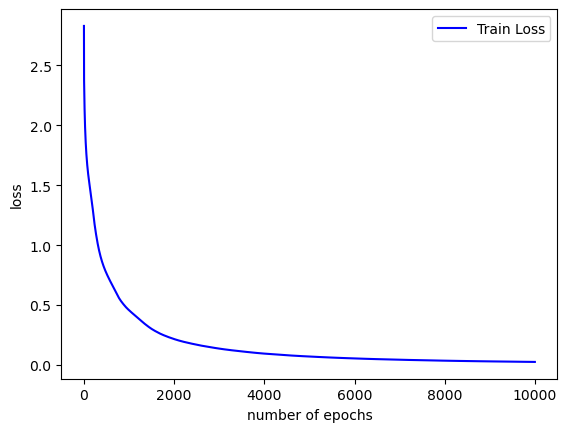

In [45]:
fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')

Text(0, 0.5, 'acurrency')

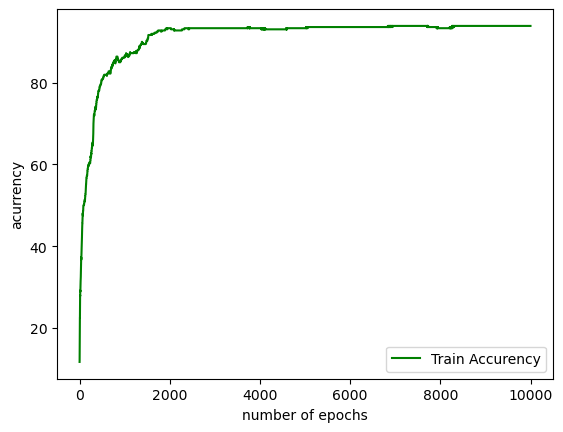

In [49]:
fig = plt.figure()
plt.plot(range(0, no_epochs), train_accurency, color='green')
plt.legend(['Train Accurency'], loc='lower right')
plt.xlabel('number of epochs')
plt.ylabel('acurrency')

#2B

In [35]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(64, 10)
        self.hidden2 = nn.Linear(10, 5)
        self.output = nn.Linear(5, 10)

    def forward(self, x):
        z = F.relu(self.hidden(x))
        z = F.relu(self.hidden2(z))
        z = self.output(z)  # no softmax. see CrossEntropyLoss() 
        return z

In [36]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 1000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  y_hat = net(train_x)

  loss = loss_func(y_hat, train_y)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
  
  if epoch % 100 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")


Starting training 
Loss in epoch 0 is 2.5382080078125
Loss in epoch 100 is 1.7717844247817993
Loss in epoch 200 is 1.1442160606384277
Loss in epoch 300 is 0.7926039099693298
Loss in epoch 400 is 0.5533164143562317
Loss in epoch 500 is 0.4381958544254303
Loss in epoch 600 is 0.3609471619129181
Loss in epoch 700 is 0.30547034740448
Loss in epoch 800 is 0.2666405439376831
Loss in epoch 900 is 0.23952198028564453
Done training 


Text(0, 0.5, 'loss')

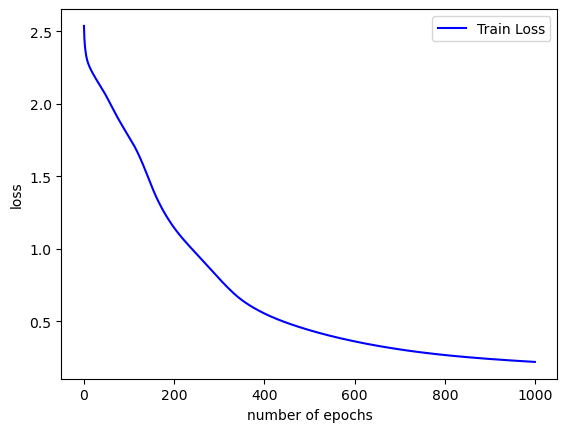

In [37]:
fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')

In [38]:
net.eval() # set network to evaluation mode
y_pred = net(test_x)
_, predicted = torch.max(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

Accuarcy is 90.55555555555556%


###3 Check if you can decrease the training loss even further if you train for more epochs. However, this can easily result in overfitting. To check that, calculate the accuracy on the test data already during training after each epoch. Show the plot the results as a second plot similiar to the one above. (Note: Normally we need to do this check on seperate validation data, not on our test data).